In [54]:
import ipynb
import amfm_decompy
import scipy
from scipy.optimize import curve_fit
from scipy.io import wavfile
from scipy import signal
from scipy.signal import butter, sosfiltfilt
import matplotlib.pyplot as plt
from matplotlib import pylab
import math
import pandas as pd
import numpy as np
import osascript
from gtts import gTTS 
import os 
import pyaudio
import wave
import keyboard  # using module keyboard
import soundfile as sf
import pyloudnorm as pyln
from sys import byteorder
from array import array
from struct import pack
import time
import subprocess
import pyttsx3
import tkinter
import librosa
import pysptk
import audiolazy
from ipynb.fs.full.concat_project2 import extract_data


# Constants

In [55]:
RATE = 22050

In [56]:
def get_data(filepath):
    data = np.load(filepath, allow_pickle=True)
    fs = RATE
    return data, fs

In [114]:
def remove_silence_from(amplitudes, threshold):
    silenced = []
    for x in amplitudes:
        if x >= threshold:
            silenced.append(x)
    return silenced

In [115]:
def get_LPCs(data):
    fs = RATE
#     plt.figure(0)
#     plt.plot(data)
    wavfile.write('temp_sound.wav', fs, np.divide(data, 50))
    data = np.float32(data)

In [116]:
data, descrip, descrip_length, fs = extract_data('../../LDC2002S28.wav')

In [117]:
def get_rms_vector(data, fs):
    temp_data = np.float32(data)
    cent = librosa.feature.rms(y=temp_data)
    return cent

In [118]:
def get_rms_stats(np_array):
    fs=RATE
    stats_matrix = []
    for data in np_array:
        rms_vector = get_rms_vector(data, fs)
        stats = get_stats(rms_vector)
        stats_matrix.append(stats)
    return stats_matrix

In [119]:
def get_stats(pitch_vector):
    mean = np.mean(pitch_vector)
    median = np.median(pitch_vector)
    low = np.min(pitch_vector)
    high = np.max(pitch_vector)
    variance = np.var(pitch_vector)
    
    #derivative
    derivative = np.diff(pitch_vector)
#     plt.figure(3)
#     plt.plot(derivative)
    d_mean = np.mean(derivative)
    d_min = np.min(derivative)
    d_max = np.max(derivative)
    return [mean, median, low, high, variance, d_mean, d_min, d_max]

In [120]:
def get_zero_vector(data, fs):
    temp_data = np.float32(data)
    cent = librosa.feature.zero_crossing_rate(y=temp_data)
    return cent

In [129]:
def get_zero_stats(np_array):
    fs=RATE
    stats_matrix = []
    for data in np_array:
        zero_vector = get_zero_vector(data, fs)
        stats = get_stats(zero_vector)
        stats_matrix.append(stats)
    return stats_matrix

In [130]:
def get_sr_vector(data, fs):
    temp_data = np.float32(data)
    cent = librosa.feature.spectral_rolloff(y=temp_data)
    return cent

In [131]:
def get_sr_stats(np_array):
    fs=RATE
    stats_matrix = []
    for data in np_array:
        sr_vector = get_sr_vector(data, fs)
        stats = get_stats(sr_vector)
        stats_matrix.append(stats)
    return stats_matrix

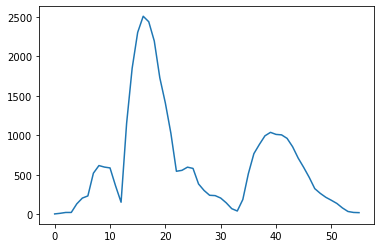

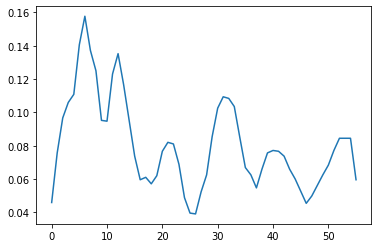

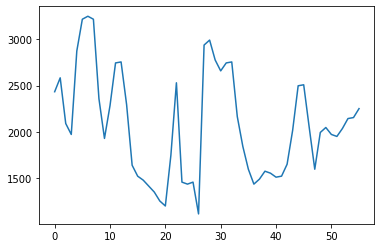

In [134]:
get_rms_stats(data)
get_zero_stats(data)
get_sr_stats(data)

arr = np.array(data[12])
rms = get_rms_vector(arr, fs)
zero = get_zero_vector(arr, fs)
sr = get_sr_vector(arr, fs)

plt.figure(1)
plt.plot(rms[0])

plt.figure(2)
plt.plot(zero[0])

plt.figure(3)
plt.plot(sr[0])
